어떤 사람의 전화 통화시간은 평균이 80초이고 표준편차가 15초인 정규분포를 따른다고 한다. 이 사람이 100번 통화했을 때 100번의 통화 중 통화시간이 92초 이상인 횟수가 25번 이상일 확률을 구하여라

정규분포 한번 쓰고 이항분포 한번 쓰자!

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [77]:
mu,sigma,experiments=80,15,100000
s=np.random.normal(mu,sigma,experiments)

In [78]:
len(s)

100000

In [79]:
s

array([74.45158051, 69.64781675, 92.20066851, ..., 85.52262014,
       73.92628282, 94.55525185])

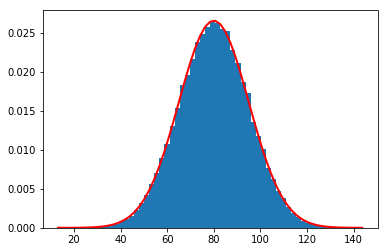

In [80]:
count, bins, ignored = plt.hist(s, 60, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=2, color='r')
plt.show()

probability over 92 seconds : 0.21321


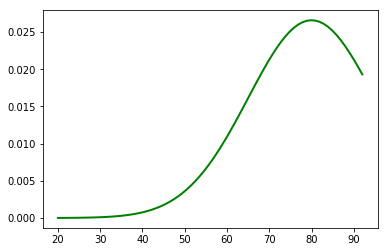

In [82]:
under92s=sum(s<92)/experiments # 92초 밑으로 나올 확률
print('probability over 92 seconds :',1-under92s)
punder92=np.linspace(20,92,72)
plt.plot(punder92, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (punder92 - mu)**2 / (2 * sigma**2) ),
          linewidth=2, color='g')
plt.show()

92초 이상 나올 확률이 0.21321이고 100번의 통화중 92초 이상이 나올 확률을 구한다....이항분포!  

Binomial distribution: ${100 \choose k}(0.21321)^{k}(1-0.21321)^{100-k}$

In [96]:
n=100
s2=np.random.binomial(n,1-under92s,50000)
s2 # 100번의 통화 중 92초 이상의 통화를 할 횟수

array([18, 17, 21, ..., 17, 30, 17])

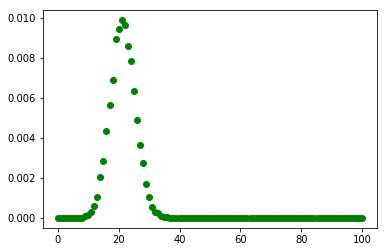

In [94]:
px1=[]
py1=[]
for i in range(n+1):
    px1.append(i)
    py1.append(sum(s2==i)*1e-5)

plt.plot(px1,py1,'go')
plt.show()

In [98]:
under25=sum(s2<=25)/50000
print("Probability under 25:",under25)
over25=sum(s2>25)/50000
print("Probability over 25:",over25)
print("Total probability",under25+over25)

Probability under 25: 0.84848
Probability over 25: 0.15152
Total probability 1.0


??? Mathematica로 하면 답은 0.1749정도

In[12]:= NIntegrate[PDF[NormalDistribution[80, 15], k], {k, 0, 92}]

Out[12]= 0.788145

In[13]:= 1 - NIntegrate[PDF[BinomialDistribution[100, 0.211855], k], {k, 0, 25}]

Out[13]= 0.174937